In [100]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime


Pageview counts by article
Get a pageview count timeseries of en.wikipedia's article Albert Enstein for the month of October 2015:
```
GET http://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Albert_Einstein/daily/2015100100/2015103100
```

In [6]:
endpoints = {
    'article': 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article',
    'project': 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate',
    'top': 'https://wikimedia.org/api/rest_v1/metrics/pageviews/top',
}

In [161]:
def views_for_article(article, domain='en', start="2015110100", end="2016113000"):
    url =   'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article' \
            '/{domain}.wikipedia/all-access/all-agents/{article}/daily/{start}/{end}' \
            .format(domain=domain, article=article, start=start, end=end)
    try:
        resp = json.loads(requests.get(url).text)['items']
    except e:
        print("Couldn't get reuqest")
        pass
    timeseries = []
    tsindex = []
    views = []
    for d in resp:
        timeseries.append({"date": datetime.strptime(d["timestamp"], "%Y%m%d00"),
                           "views": d["views"]})
        views.append(int(d["views"]))
        tsindex.append(datetime.strptime(d["timestamp"], "%Y%m%d00"))
    df = pd.DataFrame(timeseries)
    df = df.set_index("date")
    print(url)
    return tsindex, views
    

https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Zika_virus/daily/2015110100/2016113000
https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Zika_fever/daily/2015110100/2016113000
https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Paracetamol/daily/2015110100/2016113000
https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Pregnancy/daily/2015110100/2016113000
https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Mosquito/daily/2015110100/2016113000


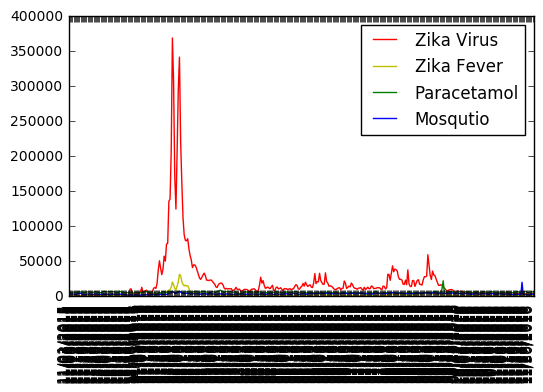

In [162]:
tsindex, ZVviews = views_for_article("Zika_virus")
_, ZVfever = views_for_article("Zika_fever")
_, Paracetamol = views_for_article("Paracetamol")
_, Pregnancy = views_for_article("Pregnancy")
_, Mosquito = views_for_article("Mosquito")
#_, GMO = views_for_article("Genetically_modified_organism")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(tsindex, ZVviews, 'r', label='Zika Virus')
plt.plot(tsindex, ZVfever, 'y', label='Zika Fever')
plt.plot(tsindex, Paracetamol, 'g', label='Paracetamol')
plt.plot(tsindex, Mosquito, 'b', label='Mosqutio')
#plt.plot(tsindex, GMO, 'b', label='GMO')
legend = plt.legend(loc='best')
plt.plot()
plt.gcf().autofmt_xdate()
plt.xticks(rotation='vertical')
plt.show()

{
  "items": [
    {
      "project": "en.wikipedia",
      "article": "Albert_Einstein",
      "granularity": "daily",
      "timestamp": "2016110100",
      "access": "all-access",
      "agent": "all-agents",
      "views": 19436
    },
    {
      "project": "en.wikipedia",
      "article": "Albert_Einstein",
      "granularity": "daily",
      "timestamp": "2016110200",
      "access": "all-access",
      "agent": "all-agents",
      "views": 20474
    },
    {
      "project": "en.wikipedia",
      "article": "Albert_Einstein",
      "granularity": "daily",
      "timestamp": "2016110300",
      "access": "all-access",
      "agent": "all-agents",
      "vie